In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## First Load the Data

This data has already been split into training and testing data.
X_train and X_test contain the current population of predator and prey animals and the y_train/y_test data contains the population which we want to predict. We need one set of y_train/y_test for the prey and one for the predator data (because we cannot predict them with the same model).

In [2]:
X_train = pd.read_csv("X_train_LV.csv", index_col =0)
X_test = pd.read_csv("X_test_LV.csv", index_col =0)

# Predicting Prey
y_train_prey = pd.read_csv("y_train_Prey_LV.csv", index_col =0)
y_test_prey = pd.read_csv("y_test_Prey_LV.csv", index_col =0)

# Or Predicting Predators
y_train_predator = pd.read_csv("y_train_Predator_LV.csv", index_col =0)
y_test_predator = pd.read_csv("y_test_Predator_LV.csv", index_col =0)



In [3]:
X_train

,Prey,Predator
0,0.721339,0.698940
1,0.646633,0.622850
2,0.652447,0.422382
3,0.766457,0.266695
4,0.726777,0.372357
...,...,...
1335,0.812839,0.258367
1336,1.257949,0.332908
1337,0.688917,0.766075
1338,1.389899,0.643280


In [4]:
y_train_prey

,Prey_next
0,0.694668
1,0.636062
2,0.594981
3,0.843506
4,0.652927
...,...
1335,0.760554
1336,1.335222
1337,0.739636
1338,1.500507


## Very Basic Example

A Regression Tree with just one split. Obviously, this is not a good way to predict data. But it gives you the basic lines of code to play around with.

In [5]:
reg_example = tree.DecisionTreeRegressor(max_depth=1)  # This initialises the Regression model and calls it "reg_example"

reg_example.fit(X_train, y_train_prey) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

# Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
y_hat_prey = reg_example.predict(X_test)

# Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
print(mean_squared_error(y_hat_prey,y_test_prey))


0.019186468568270876


## Visualising

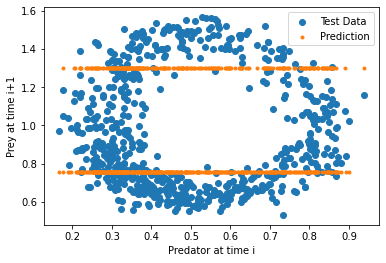

In [6]:
plt.scatter(X_test.Predator, y_test_prey, label="Test Data")
plt.scatter(X_test.Predator, y_hat_prey, marker=".",label="Prediction")
plt.xlabel("Predator at time i")
plt.ylabel("Prey at time i+1")
plt.legend()
plt.show()

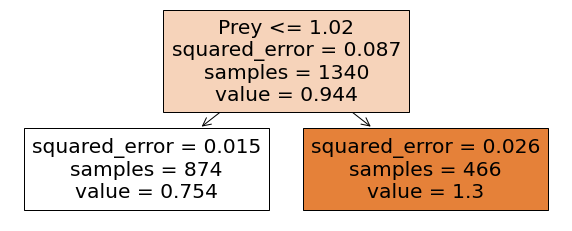

In [7]:
fig = plt.figure(figsize=(10,4)) # How large is the plot?
_ = tree.plot_tree(reg_example,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

# Now the Homework

First predict the prey.

In [8]:
MSEs = list()

for depth in range(1,21):
    
    reg = tree.DecisionTreeRegressor(max_depth= depth)  # change the depth

    reg.fit(X_train, y_train_prey) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

    # Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
    y_hat_prey = reg.predict(X_test)

    # Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
    print(depth, mean_squared_error(y_hat_prey,y_test_prey))
    MSEs += [mean_squared_error(y_hat_prey,y_test_prey)]


1 0.019186468568270876
2 0.007555746681881339
3 0.005426018076925692
4 0.004835638504441702
5 0.004806164226035903
6 0.004954368347598684
7 0.005553496443894577
8 0.005969476924513391
9 0.00624936438066405
10 0.0068349911444176275
11 0.0069763690108747625
12 0.0071221136124693515
13 0.007558824317808003
14 0.007610662774702507
15 0.007987979871979493
16 0.00820722052437128
17 0.008204771505631252
18 0.008315253983120273
19 0.00823919651283631
20 0.008219312607057553


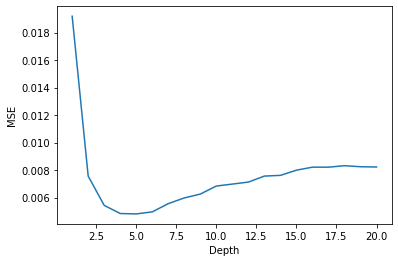

In [9]:
plt.plot(np.arange(1,21,1), MSEs)
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

Apparently, depth = 5 is the lowest MSE for predicting the prey. Now look at the predator predictions, too

In [10]:
MSEs = list()

for depth in range(1,21):
    
    reg = tree.DecisionTreeRegressor(max_depth= depth)  # change the depth

    reg.fit(X_train, y_train_predator ) # this fits the regression model: 
                                       # We use X_train to predict the next prey population y_train_pres

    # Now evaluate the model on the unknown data X_test: We have not used X_test to train the model!
    y_hat_predator  = reg.predict(X_test)

    # Compute the Mean Square Error (L2 norm) between the prediction y_hat_prey and the true next prey population y_test-prey
    print(depth, mean_squared_error(y_hat_predator,y_test_predator))
    MSEs += [mean_squared_error(y_hat_predator,y_test_predator)]


1 0.009778051757947884
2 0.005421017779575624
3 0.004524099256506334
4 0.0040193512397289225
5 0.004104375219337412
6 0.004362000943109908
7 0.004985196202116305
8 0.005399571100675132
9 0.005731305055882971
10 0.0060885243576598615
11 0.006635397707468396
12 0.006692238096346237
13 0.00688749881533288
14 0.007153904552944695
15 0.007022059408508846
16 0.006963199368556373
17 0.007063071378113511
18 0.007036003971458461
19 0.007196913627580623
20 0.007324695974406


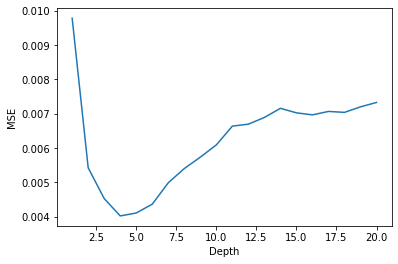

In [11]:
plt.plot(np.arange(1,21,1), MSEs)
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

Here, depth = 4 is supposed to be best here. Let's investigate this further for depth = 1 and depth = 10.

## Visualisation

Visualise the best trees and, as a comparision, a simple tree with depth 1

In [12]:
reg_prey_1 = tree.DecisionTreeRegressor(max_depth=1)
reg_prey = tree.DecisionTreeRegressor(max_depth=5)
reg_predator_1 = tree.DecisionTreeRegressor(max_depth=1)
reg_predator = tree.DecisionTreeRegressor(max_depth=4)


In [13]:
# Training
reg_prey_1.fit(X_train, y_train_prey)
reg_prey.fit(X_train, y_train_prey)
reg_predator_1.fit(X_train, y_train_predator)
reg_predator.fit(X_train, y_train_predator)

DecisionTreeRegressor(max_depth=4)

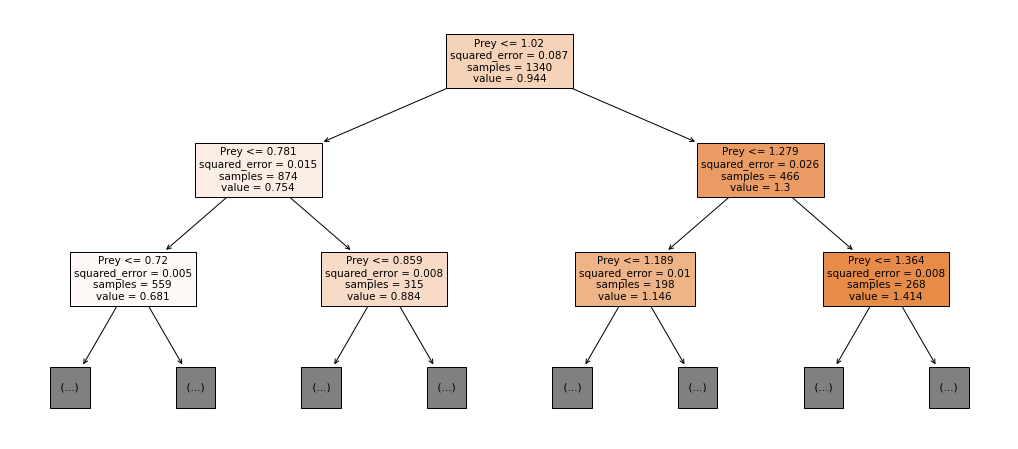

In [14]:
fig = plt.figure(figsize=(18,8)) # How large is the plot?
_ = tree.plot_tree(reg_prey,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

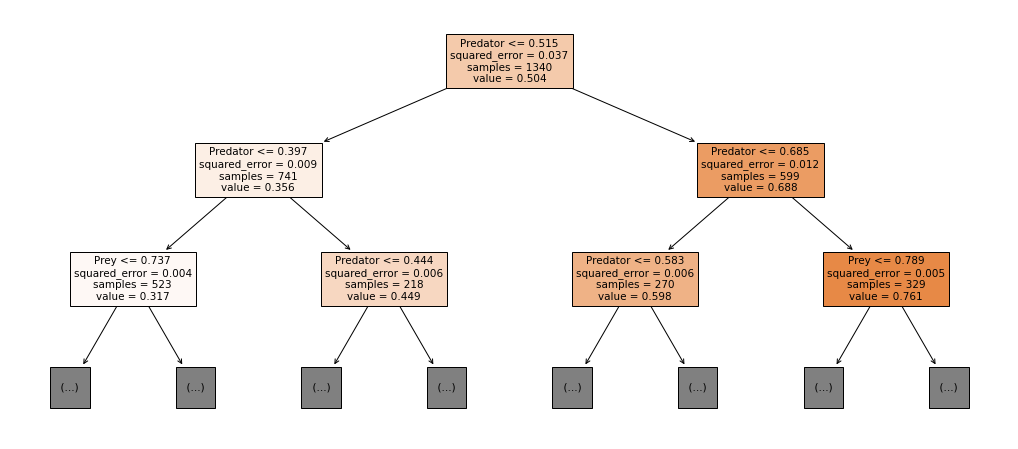

In [15]:
fig = plt.figure(figsize=(18,8)) # How large is the plot?
_ = tree.plot_tree(reg_predator,  # What is the name of the model we want to plot?
                   max_depth = 2,  # How many splits should the plot show? High max_depth gets impossible to read 
                   feature_names=X_train.columns,    # Name of the festures
                   filled=True)    # Colour-coding the leafs

In [16]:
# Prediction
y_hat_prey_1 = reg_prey_1.predict(X_test)
y_hat_prey= reg_prey.predict(X_test)
y_hat_predator_1= reg_predator_1.predict(X_test)
y_hat_predator= reg_predator.predict(X_test)

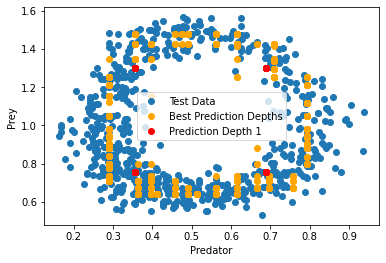

In [17]:
plt.scatter(y_test_predator, y_test_prey, label="Test Data")
plt.scatter(y_hat_predator, y_hat_prey,label="Best Prediction Depths", color = "orange")
plt.scatter(y_hat_predator_1, y_hat_prey_1,label="Prediction Depth 1", color ="red")

plt.xlabel("Predator")
plt.ylabel("Prey")
plt.legend()
plt.show()

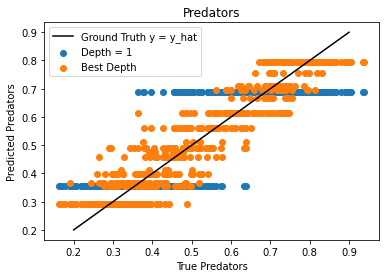

In [18]:
plt.scatter(y_test_predator,y_hat_predator_1, label="Depth = 1")
plt.scatter(y_test_predator,y_hat_predator, label="Best Depth")
plt.plot([0.2,0.9],[0.2,0.9], color ="k", label="Ground Truth y = y_hat")
plt.xlabel("True Predators")
plt.ylabel("Predicted Predators")
plt.title("Predators")
plt.legend()
plt.show()

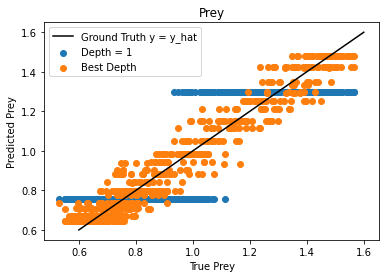

In [19]:
plt.scatter(y_test_prey,y_hat_prey_1, label="Depth = 1")
plt.scatter(y_test_prey,y_hat_prey, label="Best Depth")
plt.plot([0.6,1.6],[0.6,1.6], color ="k", label="Ground Truth y = y_hat")
plt.xlabel("True Prey")
plt.ylabel("Predicted Prey")
plt.title("Prey")
plt.legend()
plt.show()

## Combined Error?

In [20]:
def Error_2D(x1_predict, x2_predict,x1_true, x2_true):
    
    diff_x1 = x1_predict - x1_true
    diff_x2 = x2_predict - x2_true
   
    return(np.mean(diff_x1**2 + diff_x2**2))

In [21]:
Error_2D(y_test_prey.to_numpy().flatten(),
       y_test_predator.to_numpy().flatten(), 
       y_hat_prey_1.flatten(),
       y_hat_predator_1.flatten() )

0.02896452032621876

In [22]:
Error_2D(y_test_prey.to_numpy().flatten(),
       y_test_predator.to_numpy().flatten(),
       y_hat_prey.flatten(),
       y_hat_predator.flatten() )

0.008825515465764823